In [190]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

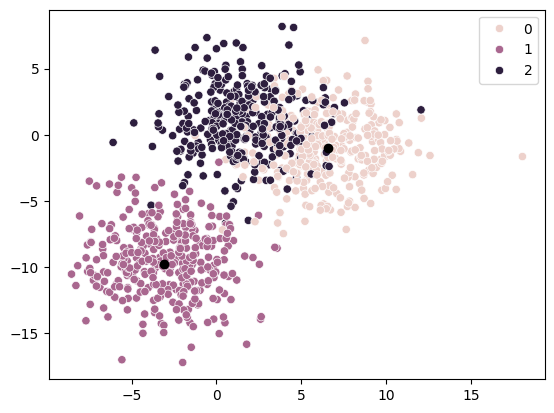

In [191]:
X, y, centers = make_blobs(centers=3, cluster_std=2.5, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [192]:
model = KMeans(n_clusters=3)
model.fit(X)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,-3.312902,-5.812258,1.0
1,10.597165,-0.359338,2.0
2,3.864153,4.449937,0.0
3,-5.842314,-11.375194,1.0
4,0.500534,-14.205144,1.0
...,...,...,...
995,-4.619830,-8.895320,1.0
996,-2.356464,-13.215490,1.0
997,2.063858,3.621692,0.0
998,6.855957,1.737395,2.0


In [193]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers, model=model, center_mode=False)

gaming


In [194]:
print(model.predict(np.array(cf).reshape(1,-1)))

[2]


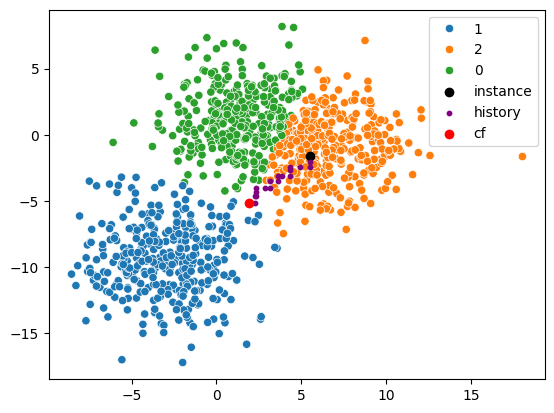

In [195]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

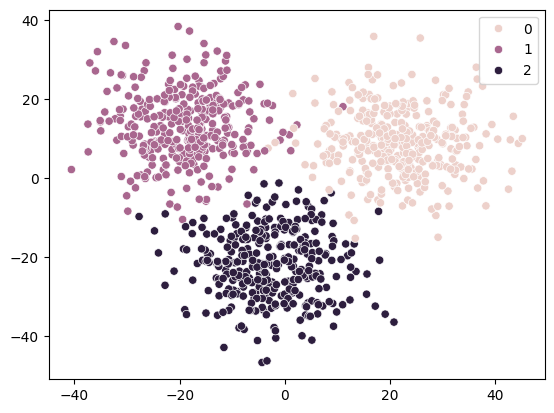

In [196]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [197]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,7.185022,-0.119525,10.795667,0.301714,-0.196537,-1.185861,22.438999,22.313337,-5.838311,1.856477,...,-3.259086,10.544534,-11.967866,6.410989,-7.102192,-16.322011,-8.373591,-16.913234,1.471651,1.0
1,8.151088,7.777940,-4.695031,-21.996675,12.698722,3.217246,3.632192,0.942684,5.994586,6.638092,...,-15.572094,-10.939502,-7.220891,-8.008310,10.952918,6.618793,-5.667355,-16.380586,-11.162032,2.0
2,4.115094,5.148346,1.701901,-16.056090,-8.235314,-1.950137,6.480462,-3.563481,-1.735387,19.809410,...,-8.491252,15.108427,-1.567711,4.122094,3.605892,6.407014,11.174126,-8.934393,12.712504,2.0
3,0.856481,5.182269,9.152290,22.772837,-7.910833,-6.405888,9.670480,-4.988575,3.921256,7.026929,...,1.589481,-3.391802,-1.093230,5.626699,-1.535361,-0.041731,-0.663475,-4.464970,5.634068,1.0
4,10.730624,4.492110,-18.388752,-10.903357,9.058511,-3.419870,-4.060052,4.843939,9.039139,-15.255480,...,-16.239289,10.699054,-9.555115,2.957468,-6.797840,-1.066343,-3.943205,4.887941,-8.489015,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.086107,-15.191197,-2.334938,4.210113,7.330161,2.622376,11.276120,6.252991,16.951638,12.894167,...,3.334962,-11.759426,8.332894,-10.294250,-10.333412,6.668357,1.619061,7.550081,3.496935,0.0
996,-6.354524,0.272051,-9.951980,0.601161,-8.279270,-21.669631,9.635071,13.341612,25.248854,-4.596048,...,4.504643,-5.332265,-1.063694,14.521927,-4.170405,-0.207259,1.231678,-6.130048,3.778137,0.0
997,-3.370627,-15.500655,-6.687586,-0.274696,-4.018657,-0.235723,19.972666,1.237847,13.814481,12.743539,...,16.509008,-5.027492,4.546831,8.098469,-1.081607,7.606727,-3.855521,-5.903748,11.904408,0.0
998,7.979274,20.171037,0.246720,11.794411,-18.213734,-12.919781,12.889506,15.983288,5.848546,0.141761,...,12.353017,10.230181,-3.570687,-14.337313,-1.504569,-10.592305,-1.541169,1.766602,-6.385143,1.0


In [198]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

gaming


In [199]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

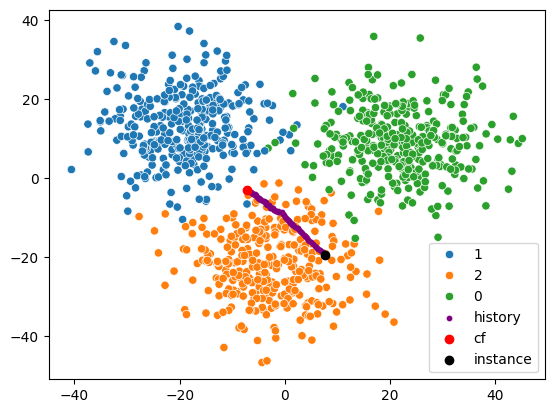

In [200]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()